In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df1=pd.read_csv("https://raw.githubusercontent.com/chitoge729/Datasets/main/hotel_bookings.csv")

In [43]:
df1.shape

(119390, 32)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [46]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# There are 488 missing values in country(object)
# There are 4 missing values in children(float)
# There are 16340 missing values in agent(float)
# There are 112593 missing values in company(float) and dropping it because of more missing values

In [47]:
df1=df1.drop(["company"], axis=1)

In [48]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [49]:
# Missing Values

In [ ]:
median1=df1["children"].median()
median1

In [11]:
df1["children"].replace(np.nan,median1,inplace=True)

In [12]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [13]:
median2=df1["agent"].median()
median2

14.0

In [14]:
df1["agent"].replace(np.nan,median2,inplace=True)

In [15]:
df1.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [16]:
mode1=df1["country"].mode().values[0]
mode1

'PRT'

In [51]:
df1["country"].replace(np.nan,mode1,inplace=True)

In [52]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [53]:
duplicate=df1.duplicated()
print(duplicate.sum())

32020


In [54]:
df1.drop_duplicates(inplace=True)

In [55]:
df1.duplicated().sum()

0

In [56]:
df1.shape

(87370, 31)

<AxesSubplot:>

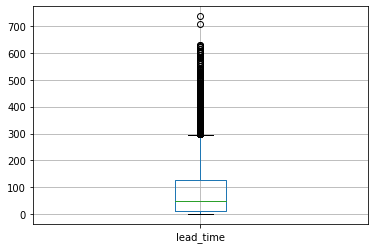

In [57]:
# Outliers
df1.boxplot(column=["lead_time"])

In [58]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=Q3+1.5*IQR
  return lower_range,upper_range

In [59]:
low_leadtime,high_leadtime=remove_outlier(df1["lead_time"])
df1["lead_time"]=np.where(df1["lead_time"]>high_leadtime,high_leadtime,df1["lead_time"])
df1["lead_time"]=np.where(df1["lead_time"]<low_leadtime,low_leadtime,df1["lead_time"])

<AxesSubplot:>

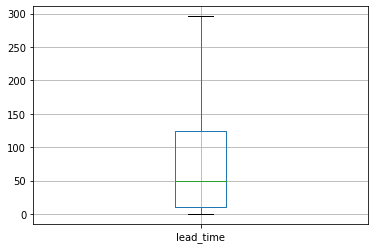

In [60]:
df1.boxplot(column=["lead_time"])

In [61]:
dummies=pd.get_dummies(df1[["hotel","arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","customer_type","reservation_status","reservation_status_date"]])

In [62]:
dummies.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df1=pd.concat([df1,dummies],axis=1)

In [64]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,August,35,30,2,5,2,...,0,0,0,0,0,0,0,0,0,0
119386,City Hotel,0,102.0,2017,August,35,31,2,5,3,...,0,0,0,0,0,0,0,0,0,0
119387,City Hotel,0,34.0,2017,August,35,31,2,5,2,...,0,0,0,0,0,0,0,0,0,0
119388,City Hotel,0,109.0,2017,August,35,31,2,5,2,...,0,0,0,0,0,0,0,0,0,0


In [76]:
columns=["hotel","arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","customer_type","reservation_status","reservation_status_date"]
column1=["reservation_status_date"]

In [79]:
# Columns are already dropped using df1.drop(column1,axis=1,inplace=True)

In [80]:
df1

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,2015,27,1,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2015,27,1,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2015,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,2017,35,30,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,2017,35,31,2,5,3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,2017,35,31,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,2017,35,31,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df1.dtypes

is_canceled                          int64
arrival_date_year                    int64
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
                                     ...  
reservation_status_date_9/28/2016    uint8
reservation_status_date_9/29/2015    uint8
reservation_status_date_9/29/2016    uint8
reservation_status_date_9/30/2015    uint8
reservation_status_date_9/30/2016    uint8
Length: 1183, dtype: object

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Columns: 1183 entries, is_canceled to reservation_status_date_9/30/2016
dtypes: float64(3), int64(15), object(1), uint8(1164)
memory usage: 110.3+ MB
